# Session1: Pandas


### What is Pandas?
* Pandas can be thought as Numpy arrays with headers
* A Heterogeneous Data strctures meaning that it can contain variety of data types like integers, floats, strings and datetime.
* Powerful tool to work with missing data, time series and to do basic database functions like group by.

it's full docimentation can be found in https://pandas.pydata.org/pandas-docs/stable/

### Why and when to use Pandas?
* To work with tabular or structured data (like DB tables, Excel sheets or CSV files)
* Import data
* Clean up messy data
* Explore data and gain insight into data
* Process and repare data fro analysis
* Analyse the data (together with other packages liek sklearn)

### The pandas data structure:
* **Series**
Series is a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called index.

* **DataFrame**
DataFrame is a tabular data structure (multi-dimensional object to hold labeled data) comprised of rows and columns. It is a multiple Series objects which share the same index.

![Pandas data structure](../imgs/base_01_pandas_5_0.png)

In [2]:
import pandas as pd
import datetime
import numpy
import matplotlib.pyplot

In [29]:
student_df = pd.DataFrame({"Name":['Michale', 'Susan', 'Fiona', 'Tedd', 'Sabrina'],
                           "Grades":[0.7, 0.5, 0.8, 0.1, 0.9], 
                           "student_ID":[13245,17654,19876,12987,19847],
                           "DOB": [datetime.datetime.strptime('16Sep1994', '%d%b%Y'),datetime.datetime.strptime('16Oct1987', '%d%b%Y'),datetime.datetime.strptime('16Mar2001', '%d%b%Y'),datetime.datetime.strptime('16Sep2012', '%d%b%Y'),datetime.datetime.strptime('1May1990', '%d%b%Y')]})

In [30]:
student_df

,DOB,Grades,Name,student_ID
0,1994-09-16,0.7,Michale,13245
1,1987-10-16,0.5,Susan,17654
2,2001-03-16,0.8,Fiona,19876
3,2012-09-16,0.1,Tedd,12987
4,1990-05-01,0.9,Sabrina,19847


In [31]:
type(student_df.Name)

pandas.core.series.Series

### Attributes of DataFrame

* **Index**
The index (row labels) of the DataFrame

In [32]:
student_df.index

RangeIndex(start=0, stop=5, step=1)

* **Columns**
to return the headers'names of the dataFrame

In [33]:
student_df.columns

Index(['DOB', 'Grades', 'Name', 'student_ID'], dtype='object')

* **Data types**
To check the datatypes of the different columns

In [34]:
student_df.dtypes

DOB           datetime64[ns]
Grades               float64
Name                  object
student_ID             int64
dtype: object

#### Why the data type of "Name" is object not a string ??
The dtype object comes from NumPy, it describes the type of element in a ndarray. Every element in a ndarray must has the same size in byte. For int64 and float64, they are 8 bytes. But for strings, the length of the string is not fixed. So instead of save the bytes of strings in the ndarray directly, Pandas use object ndarray, which save pointers to objects, because of this the dtype of this kind ndarray is object.

![Pandas data structure](../imgs/PFF44.png)

In [37]:
student_df.values

array([[Timestamp('1994-09-16 00:00:00'), 0.7, 'Michale', 13245],
       [Timestamp('1987-10-16 00:00:00'), 0.5, 'Susan', 17654],
       [Timestamp('2001-03-16 00:00:00'), 0.8, 'Fiona', 19876],
       [Timestamp('2012-09-16 00:00:00'), 0.1, 'Tedd', 12987],
       [Timestamp('1990-05-01 00:00:00'), 0.9, 'Sabrina', 19847]],
      dtype=object)

* **To get an overview of that information about the DataFrame, use infor()**

In [39]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
DOB           5 non-null datetime64[ns]
Grades        5 non-null float64
Name          5 non-null object
student_ID    5 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 240.0+ bytes


* **Shape**
like numpy arrays, you can use shape to return the dimensions of hte DataFrame

In [41]:
student_df.shape

(5, 4)

### Series attributes

**Reminder**, a series is a one-dimensional data (a column of a DataFrame)

In [43]:
grades = student_df["Grades"]

#### similar to DataFrame attributes, Series also has index and value attributes but not columns (because it's basically one column)

In [45]:
grades.index

RangeIndex(start=0, stop=5, step=1)

**Using values, you can access the underlying numpy array representation of hte column**

In [46]:
grades.values

array([0.7, 0.5, 0.8, 0.1, 0.9])

#### like Numpy array you can use index to slice column values

In [48]:
grades.values[:2]

array([0.7, 0.5])

In [50]:
grades[3]

0.1

#### Numpy operations can also be applid to Datafrmaes / Series

* **Element-wise operations**

In [51]:
grades * 100

0    70.0
1    50.0
2    80.0
3    10.0
4    90.0
Name: Grades, dtype: float64

* **Range methods**

In [52]:
grades.mean()

0.6

* **Boolean(conditional) indexing**

In [54]:
grades[grades>0.5]

0    0.7
2    0.8
4    0.9
Name: Grades, dtype: float64

### Data import and export
Pandas can import and export variet of data files like:
* csv, text
* SQL databse
* Excel
* json
* others (eg. HDF5, pickle,etc)

In [487]:
titanic_df = pd.read_csv("data/titanic.csv")

In [488]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Data exploration

In [489]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [490]:
titanic_df.tail(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Basic summary statistics**

In [491]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Visualizing data using pandas DataFrame**

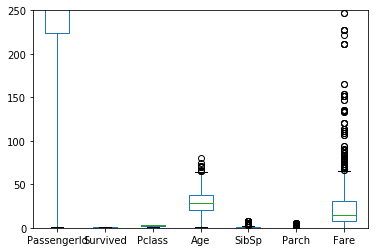

In [492]:
titanic_df.plot(kind='box', ylim=[0,250])

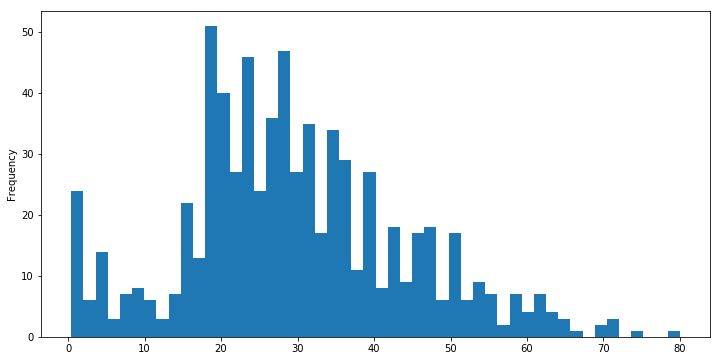

In [493]:
titanic_df['Age'].plot(figsize = (12,6), kind='hist', bins=50)

### Data cleaning
When the data has redundancy or contains NaN values. Pandas has different techniques to clean the data.


**Data redundancy**
How to know if there is redundancy in our data columns?

In [494]:
titanic_df.duplicated().unique()

array([False])

In [495]:
titanic_df.Age.duplicated().unique()

array([False,  True])

In [496]:
titanic_df.Name.duplicated().unique()

array([False])

In [497]:
titanic_df.Pclass.duplicated().unique()

array([False,  True])

In [498]:
titanic_df.shape

(891, 12)

In [501]:
#keep = {'first', 'last', 'False'}
#first : Drop duplicates except for the first occurrence.
#last : Drop duplicates except for the last occurrence.
#False : Drop all duplicates.
titanic_df = titanic_df.drop_duplicates(subset=['Age'], keep='first')

In [502]:
titanic_df.shape

(89, 12)

In [503]:
titanic_df.Pclass.duplicated().unique()

array([False,  True])

#### How to know if there is any missing data?

In [504]:
titanic_df.Age.isna().unique()

array([False,  True])

In [505]:
titanic_df.Parch.isna().unique()

array([False])

In [506]:
titanic_df.Cabin.isna().unique()

array([ True, False])

#### Empty records. How Pandas handle empty (NaN) records?
* remove all the Nan records (dropna())
* replace NaN values with others (fillna(x))
* Interpolation: performs linear interpolation at missing datapoints.

In [507]:
titanic_df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'D33', 'B30', 'C83', 'F G73', 'E31', 'A5', 'C110',
       'F2', 'B19', 'A7', 'C49', 'C87', 'E67', 'D7', 'C22 C26', 'D37',
       'E12', 'C101', 'A23'], dtype=object)

In [508]:
titanic_df.Cabin.dropna().unique()

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'D33', 'B30', 'C83', 'F G73', 'E31', 'A5', 'C110', 'F2', 'B19',
       'A7', 'C49', 'C87', 'E67', 'D7', 'C22 C26', 'D37', 'E12', 'C101',
       'A23'], dtype=object)

In [509]:
# Fillna
titanic_df.Age = titanic_df.Age.fillna(titanic_df.Age.mean())

/Users/fatma/anaconda2/envs/py35/lib/python3.5/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [510]:
titanic_df.Age.isna().unique()

array([False])

In [511]:
titanic_df.shape

(89, 12)

In [512]:
#interpolation
s = pd.Series([0, 1, np.nan, 3])
print (s)

0    0.0
1    1.0
2    NaN
3    3.0
dtype: float64


In [513]:
 s.interpolate()

0    0.0
1    1.0
2    2.0
3    3.0
dtype: float64

### Selecting and filtering Data (basic database operations)

In [514]:
#selecting one columns
titanic_df['Age'][:10]

0     22.000000
1     38.000000
2     26.000000
3     35.000000
5     33.716932
6     54.000000
7      2.000000
8     27.000000
9     14.000000
10     4.000000
Name: Age, dtype: float64

In [515]:
#selecting multiuple columns
titanic_df[['Age','Fare']][:10]

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
5,33.716932,8.4583
6,54.000000,51.8625
7,2.000000,21.0750
8,27.000000,11.1333
9,14.000000,30.0708
10,4.000000,16.7000


In [516]:
#slicing
titanic_df[10:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.550,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.050,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.000,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.000,NaN,S


#### So far we have seen how to select either by column or by row, 
#### What will happen when we try both

In [517]:
#selecting multuple columns
titanic_df[['Age','Fare']][10]

KeyError: 10

#### How to select by column and row in the same time???
* loc: selection by label
* iloc: selection by position

In [518]:
titanic_df.loc['Bonnell, Miss. Elizabeth', 'Fare']

KeyError: 'the label [Bonnell, Miss. Elizabeth] is not in the [index]'

In [519]:
titanic_indexed_by_Name = titanic_df.set_index('Name')

In [520]:
titanic_indexed_by_Name.loc['Bonnell, Miss. Elizabeth', 'Fare']

26.55

In [521]:
titanic_indexed_by_Name.loc['Bonnell, Miss. Elizabeth': 'Andersson, Mr. Anders Johan', 'Fare']

Name
Bonnell, Miss. Elizabeth          26.550
Saundercock, Mr. William Henry     8.050
Andersson, Mr. Anders Johan       31.275
Name: Fare, dtype: float64

#### The difference between retrive based on column value and index

In [528]:
#retrive based on colum value
titanic_df.loc[20.0:31.0,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C


In [529]:
#retrive based on index
titanic_df_indexed_by_Age = titanic_df.set_index('Age')
titanic_df_indexed_by_Age.loc[20.0:31.0,:]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,,,
20.0,13,0,3,"Saundercock, Mr. William Henry",male,0,0,A/5. 2151,8.050,NaN,S
39.0,14,0,3,"Andersson, Mr. Anders Johan",male,1,5,347082,31.275,NaN,S
55.0,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,0,0,248706,16.000,NaN,S
31.0,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,1,0,345763,18.000,NaN,S


In [530]:
#selecting by position 
titanic_df.iloc[30:40,1:4]

,Survived,Pclass,Name
57,0,3,"Novel, Mr. Mansouer"
58,1,2,"West, Miss. Constance Mirium"
59,0,3,"Goodwin, Master. William Frederick"
62,0,1,"Harris, Mr. Henry Birkhardt"
68,1,3,"Andersson, Miss. Erna Alexandra"
70,0,2,"Jenkin, Mr. Stephen Curnow"
71,0,3,"Goodwin, Miss. Lillian Amy"
75,0,3,"Moen, Mr. Sigurd Hansen"
78,1,2,"Caldwell, Master. Alden Gates"
79,1,3,"Dowdell, Miss. Elizabeth"


### Filtering
To select rows based on a certain condition. This can be done with "boolean indexing"

In [534]:
titanic_df['Fare'] > 50

0      False
1       True
2      False
3       True
5      False
6       True
7      False
8      False
9      False
10     False
11     False
12     False
13     False
15     False
18     False
21     False
22     False
23     False
24     False
27      True
30     False
33     False
35      True
37     False
38     False
43     False
50     False
52      True
53     False
54      True
       ...  
170    False
174    False
177    False
179    False
203    False
227    False
252    False
254    False
262     True
275     True
296    False
305     True
314    False
366     True
419    False
438     True
446    False
460    False
469    False
571     True
626    False
630    False
672    False
676    False
720    False
755    False
767    False
803    False
843    False
851    False
Name: Fare, Length: 89, dtype: bool

In [535]:
titanic_df[titanic_df['Fare'] > 50]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.00,1,0,113789,52.0000,NaN,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.00,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.00,0,1,113509,61.9792,B30,C
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.00,1,0,36973,83.4750,C83,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.00,1,0,W.E.P. 5734,61.1750,E31,S


### The group-by operation

#### What is group by?
is applying aggregate functions (COUNT, MAX, MIN, SUM, AVG) to group the result-set by one or more columns.

Group by Steps:
* Applying a condition to the data to get certain groups
* Applying aggreagte functions to these groups

In [537]:
df = pd.DataFrame({'Key':['A','B','C','A','B','C','A','B','C'],
                  'data': [0,5,10,5,10,15,10,15,20]})

In [539]:
for key in ['A','B','C']:
    print(key, df[df['Key'] == key]['data'].sum())

A 15
B 30
C 45


#### There is a simpler way to do the same with Pandas DataFrame
This can be done using groupby() function

In [542]:
df.groupby('Key').sum()

,data
Key,
A,15
B,30
C,45


In [545]:
df.groupby('Key').aggregate(np.mean)

,data
Key,
A,5
B,10
C,15


### Time series data in Pandas

In [2]:
import pandas as pd
time_df_1 = pd.read_csv('data/20000101_20161231-NO2.csv')

In [3]:
time_df_1.head(5)

,timestamp;BASCH;BONAP;PA18;VERS
0,;microg/m3;microg/m3;microg/m3;microg/m3
1,2000-01-01 01:00:00;108.0;n/d;65.0;47.0
2,2000-01-01 02:00:00;104.0;60.0;77.0;42.0
3,2000-01-01 03:00:00;97.0;58.0;73.0;34.0
4,2000-01-01 04:00:00;77.0;52.0;57.0;29.0


In [4]:
time_df = pd.read_csv('data/20000101_20161231-NO2.csv', sep=';', skiprows= [1],na_values = ['n/d'], parse_dates=True)

In [5]:
time_df.head(5)

,timestamp,BASCH,BONAP,PA18,VERS
0,2000-01-01 01:00:00,108.0,NaN,65.0,47.0
1,2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2,2000-01-01 03:00:00,97.0,58.0,73.0,34.0
3,2000-01-01 04:00:00,77.0,52.0,57.0,29.0
4,2000-01-01 05:00:00,79.0,52.0,64.0,28.0


In [6]:
index = pd.DatetimeIndex(time_df.timestamp.values)
time_df = time_df.set_index(index)

In [7]:
time_df["2010-01-01 09:00": "2010-01-01 12:00"]

,timestamp,BASCH,BONAP,PA18,VERS
2010-01-01 09:00:00,2010-01-01 09:00:00,31.0,27.0,28.0,14.0
2010-01-01 10:00:00,2010-01-01 10:00:00,41.0,31.0,30.0,14.0
2010-01-01 11:00:00,2010-01-01 11:00:00,48.0,32.0,33.0,16.0
2010-01-01 12:00:00,2010-01-01 12:00:00,63.0,33.0,39.0,19.0


In [8]:
time_df["2012-01": "2012-03"].head(5)

,timestamp,BASCH,BONAP,PA18,VERS
2012-01-01 00:00:00,2012-01-01 00:00:00,44.0,34.0,32.0,7.0
2012-01-01 01:00:00,2012-01-01 01:00:00,56.0,35.0,29.0,9.0
2012-01-01 02:00:00,2012-01-01 02:00:00,50.0,36.0,29.0,7.0
2012-01-01 03:00:00,2012-01-01 03:00:00,46.0,34.0,22.0,8.0
2012-01-01 04:00:00,2012-01-01 04:00:00,47.0,29.0,21.0,12.0


In [9]:
time_df.index

DatetimeIndex(['2000-01-01 01:00:00', '2000-01-01 02:00:00',
               '2000-01-01 03:00:00', '2000-01-01 04:00:00',
               '2000-01-01 05:00:00', '2000-01-01 06:00:00',
               '2000-01-01 07:00:00', '2000-01-01 08:00:00',
               '2000-01-01 09:00:00', '2000-01-01 10:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', length=149039, freq=None)

In [10]:
time_df.index.hour

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', length=149039)

In [11]:
time_df.index.year

Int64Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
            ...
            2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
           dtype='int64', length=149039)

In [ ]:
time_df.resample('M').mean().head()

In [587]:
time_df.resample('D').mean().head()

,BASCH,BONAP,PA18,VERS
2000-01-01,83.173913,53.772727,64.695652,36.521739
2000-01-02,78.708333,59.250000,63.708333,17.166667
2000-01-03,82.333333,73.541667,61.000000,23.083333
2000-01-04,78.500000,73.708333,48.863636,23.791667
2000-01-05,94.291667,90.458333,60.166667,28.214286


In [588]:
time_df.resample('D').max().head()

,timestamp,BASCH,BONAP,PA18,VERS
2000-01-01,2000-01-01 23:00:00,109.0,62.0,77.0,59.0
2000-01-02,2000-01-02 23:00:00,109.0,96.0,78.0,45.0
2000-01-03,2000-01-03 23:00:00,120.0,102.0,72.0,37.0
2000-01-04,2000-01-04 23:00:00,115.0,107.0,78.0,43.0
2000-01-05,2000-01-05 23:00:00,141.0,115.0,82.0,41.0
